In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
vicktum=pd.read_csv('Victims_of_rape.csv')
vicktum.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [4]:
vicktum.tail()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0
1049,West Bengal,2010,Victims of Other Rape,2307,0,21,51,1777,458,2307,0


In [5]:
df=pd.DataFrame(data=vicktum)

In [6]:
df.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


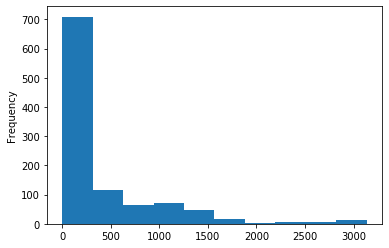

In [7]:
df['Rape_Cases_Reported'].plot.hist()

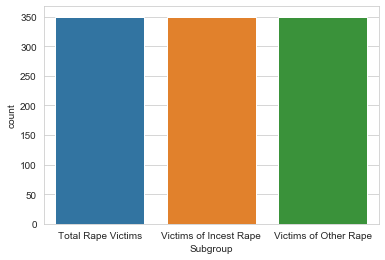

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Subgroup',data=df)

In [9]:
max_m=df['Rape_Cases_Reported'].max()
max_m

3135

In [10]:
min_m=df['Rape_Cases_Reported'].min()
min_m

0

In [11]:
mean_rape_case=df['Rape_Cases_Reported'].mean()
mean_rape_case

361.92

In [12]:
dfcorr=df.corr()
dfcorr

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
Year,1.000000,0.070944,0.095368,0.057081,0.060579,0.069109,0.053460,0.071121,0.066608
Rape_Cases_Reported,0.070944,1.000000,0.652470,0.762842,0.780262,0.966432,0.925609,0.999998,0.665398
Victims_Above_50_Yrs,0.095368,0.652470,1.000000,0.595057,0.588920,0.566389,0.638712,0.652482,0.514891
Victims_Between_10-14_Yrs,0.057081,0.762842,0.595057,1.000000,0.834968,0.615116,0.599692,0.763069,0.827184
Victims_Between_14-18_Yrs,0.060579,0.780262,0.588920,0.834968,1.000000,0.615138,0.605228,0.780669,0.783994
Victims_Between_18-30_Yrs,0.069109,0.966432,0.566389,0.615116,0.615138,1.000000,0.907376,0.966303,0.529155
Victims_Between_30-50_Yrs,0.053460,0.925609,0.638712,0.599692,0.605228,0.907376,1.000000,0.925359,0.467843
Victims_of_Rape_Total,0.071121,0.999998,0.652482,0.763069,0.780669,0.966303,0.925359,1.000000,0.666310
Victims_Upto_10_Yrs,0.066608,0.665398,0.514891,0.827184,0.783994,0.529155,0.467843,0.666310,1.000000


In [18]:
df.columns

Index(['Area_Name', 'Year', 'Subgroup', 'Rape_Cases_Reported',
       'Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_of_Rape_Total',
       'Victims_Upto_10_Yrs'],
      dtype='object')

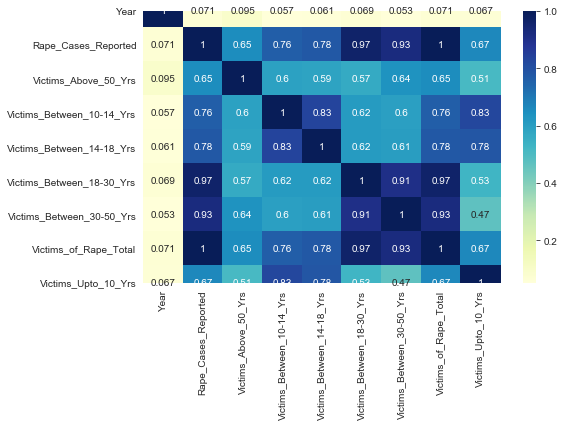

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(dfcorr,cmap='YlGnBu',annot=True)

In [22]:
df.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
Area_Name                    1050 non-null object
Year                         1050 non-null int64
Subgroup                     1050 non-null object
Rape_Cases_Reported          1050 non-null int64
Victims_Above_50_Yrs         1050 non-null int64
Victims_Between_10-14_Yrs    1050 non-null int64
Victims_Between_14-18_Yrs    1050 non-null int64
Victims_Between_18-30_Yrs    1050 non-null int64
Victims_Between_30-50_Yrs    1050 non-null int64
Victims_of_Rape_Total        1050 non-null int64
Victims_Upto_10_Yrs          1050 non-null int64
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [24]:
df.describe()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
count,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2005.50000,361.920000,1.866667,23.657143,53.085714,212.937143,60.236190,362.198095,10.415238
std,2.87365,592.180572,4.640286,50.677418,115.127899,350.135760,118.322713,592.418089,19.533134
min,2001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,2005.50000,37.000000,0.000000,3.000000,5.000000,15.500000,4.000000,37.000000,2.000000
75%,2008.00000,527.500000,1.000000,19.000000,42.000000,308.000000,58.750000,531.500000,11.000000
max,2010.00000,3135.000000,43.000000,416.000000,826.000000,1835.000000,811.000000,3136.000000,131.000000


In [25]:
df.dtypes

Area_Name                    object
Year                          int64
Subgroup                     object
Rape_Cases_Reported           int64
Victims_Above_50_Yrs          int64
Victims_Between_10-14_Yrs     int64
Victims_Between_14-18_Yrs     int64
Victims_Between_18-30_Yrs     int64
Victims_Between_30-50_Yrs     int64
Victims_of_Rape_Total         int64
Victims_Upto_10_Yrs           int64
dtype: object

In [27]:
are_name=pd.get_dummies(df['Area_Name'],drop_first=True,prefix='Area_Name')
subgroup=pd.get_dummies(df['Subgroup'],drop_first=True,prefix='Subgroup')

In [28]:
df.drop(['Area_Name','Subgroup'],axis=1,inplace=True)

In [30]:
x=df.drop('Victims_of_Rape_Total',axis=1).head()
x

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_Upto_10_Yrs
0,2001,3,0,0,3,0,0,0
1,2001,1,0,0,1,0,0,0
2,2001,2,0,0,2,0,0,0
3,2002,2,0,0,1,1,0,0
4,2002,0,0,0,0,0,0,0


In [31]:
y=df['Victims_of_Rape_Total'].head()
y

0    3
1    1
2    2
3    2
4    0
Name: Victims_of_Rape_Total, dtype: int64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [33]:
ln=LinearRegression()

In [36]:
ln.fit(x_train,y_train)
ln.score(x_train,y_train)
predln=ln.predict(x_test)

In [38]:
print(predln)
print(mean_squared_error(y_test,predln))
print(mean_absolute_error(y_test,predln))
print(np.sqrt(mean_squared_error(y_test,predln)))

[1.00000000e+00 3.72895936e-04]
6.952568969591399e-08
0.00018644796820549425
0.0002636772453131176


In [39]:
from sklearn.externals import joblib
joblib.dump(ln,'victimsfile.obj')

['victimsfile.obj']